In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from admix.data import quantile_normalize
import seaborn as sns

In [48]:
df_assoc = pd.read_excel("out/locus_het/sumstats.xlsx").dropna()
df_assoc = df_assoc[(df_assoc.EUR_af != 0) & (df_assoc.AFR_af != 0)].reset_index(
    drop=True
)

df_assoc.loc[:, "expected_HET_pval"] = stats.norm.sf(
    quantile_normalize(-df_assoc.HET_pval)
)
df_assoc.loc[:, "bonferroni_significant"] = df_assoc["HET_pval"] < 0.05 / len(df_assoc)

df_assoc["hue"] = ""
df_assoc.loc[df_assoc.bonferroni_significant, "hue"] = df_assoc.loc[
    df_assoc.bonferroni_significant, "trait"
]
df_assoc.loc[~df_assoc.bonferroni_significant, "hue"] = "non-sig"

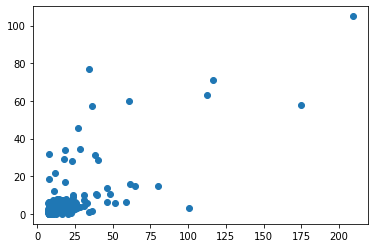

In [33]:
plt.scatter(-np.log10(df_assoc.GWAS_catalog_pval), -np.log10(df_assoc.assoc_pval))

In [49]:
pval = df_assoc.HET_pval
chi2 = stats.norm.ppf(pval / 2) ** 2
print(f"lambda_gc = {np.quantile(chi2, 0.5) / stats.chi2.ppf(0.5, 1):.3g}")

lambda_gc = 1.8


Text(0, 0.5, 'HET $-\\log_{10}(p)$')

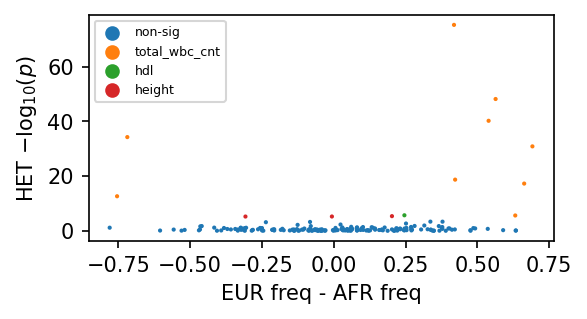

In [53]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
# ax.scatter(df_assoc.EUR_af - df_assoc.AFR_af, -np.log10(df_assoc.HET_pval), s=4)
sns.scatterplot(
    x=df_assoc.EUR_af - df_assoc.AFR_af,
    y=-np.log10(df_assoc.HET_pval),
    hue=df_assoc.hue,
    s=4,
    linewidth=0,
    palette="tab10",
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="best", fontsize=6)

ax.set_xlabel("EUR freq - AFR freq")
ax.set_ylabel("HET $-\log_{10}(p)$")

Text(0, 0.5, 'HET $-\\log_{10}(p)$')

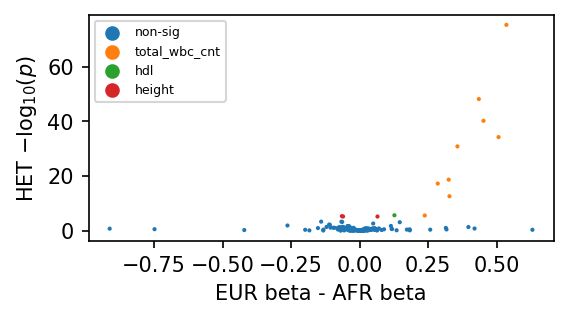

In [55]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
# ax.scatter(df_assoc.EUR_af - df_assoc.AFR_af, -np.log10(df_assoc.HET_pval), s=4)
sns.scatterplot(
    x=df_assoc.EUR_beta - df_assoc.AFR_beta,
    y=-np.log10(df_assoc.HET_pval),
    hue=df_assoc.hue,
    s=4,
    linewidth=0,
    palette="tab10",
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="best", fontsize=6)

ax.set_xlabel("EUR beta - AFR beta")
ax.set_ylabel("HET $-\log_{10}(p)$")

Text(0, 0.5, 'HET $-\\log_{10}(p)$')

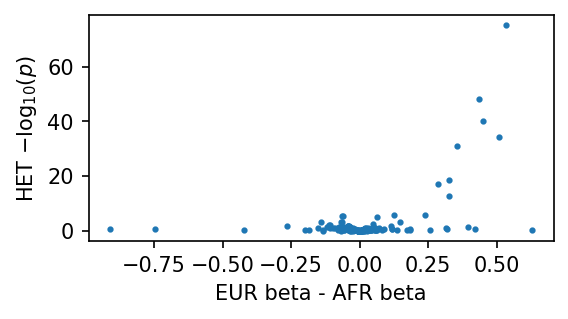

In [45]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
ax.scatter(df_assoc.EUR_beta - df_assoc.AFR_beta, -np.log10(df_assoc.HET_pval), s=4)
ax.set_xlabel("EUR beta - AFR beta")
ax.set_ylabel("HET $-\log_{10}(p)$")

In [35]:
df_assoc

,trait,id,rsId,chromosome,position,nearestCodingGene,nearestCodingGeneDistance,GWAS_catalog_pval,ldSetSize,EUR_af,AFR_af,EUR_beta,EUR_beta_stderr,AFR_beta,AFR_beta_stderr,HET_pval,assoc_pval
0,crp,1_65624099_C_T,rs6700896,1,65624099,PDE4B,168415,2.000000e-25,129,0.408433,0.465942,-0.078825,0.026669,-0.058604,0.016611,0.475105,3.624774e-05
1,crp,1_154454494_A_C,rs2228145,1,154454494,TDRD10,47725,9.000000e-34,21,0.412968,0.076964,-0.156980,0.026353,-0.016431,0.032193,0.000445,1.553822e-06
2,crp,1_159685728_G_A,rs726640,1,159685728,CRP,28861,6.000000e-117,47,0.001030,0.208739,0.232544,0.483246,0.365418,0.020218,0.783419,1.096978e-71
3,crp,1_247438293_T_C,rs12239046,1,247438293,OR2B11,19812,1.000000e-09,3,0.638524,0.451357,0.035252,0.022846,0.035906,0.016719,0.978590,1.791943e-02
4,crp,2_27508073_T_C,rs1260326,2,27508073,GCKR,11234,3.000000e-27,5,0.604076,0.918421,-0.094591,0.027497,-0.065589,0.021587,0.212499,5.435033e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,bmi,13_53528071_G_A,rs12429545,13,53528071,OLFM4,499258,2.000000e-08,6,0.155075,0.018685,-0.014697,0.029416,0.076984,0.043621,0.079769,5.743546e-01
198,bmi,16_3963466_C_T,rs2531995,16,3963466,CREBBP,82740,5.000000e-09,8,0.579632,0.094109,0.001340,0.016689,0.041867,0.020054,0.102777,1.909695e-01
199,bmi,16_53769662_T_A,rs1558902,16,53769662,RPGRIP1L,65724,4.000000e-29,29,0.381213,0.038373,0.063977,0.019643,0.055455,0.030748,0.810922,2.757239e-04
200,bmi,18_60161902_T_C,rs6567160,18,60161902,MC4R,210873,2.000000e-11,17,0.208939,0.182251,0.086659,0.025641,0.050865,0.015117,0.212765,9.926148e-06


In [26]:
def qqplot(pval, ax=None):
    if ax is None:
        ax = plt.gca()
    expected_pval = stats.norm.sf(quantile_normalize(-pval))
    ax.scatter(-np.log10(expected_pval), -np.log10(pval), s=2)
    lim = max(-np.log10(expected_pval))
    ax.plot([0, lim], [0, lim], "r--")
    ax.set_xlabel("Expected -$\log_{10}(p)$")
    ax.set_ylabel("Observed -$\log_{10}(p)$")

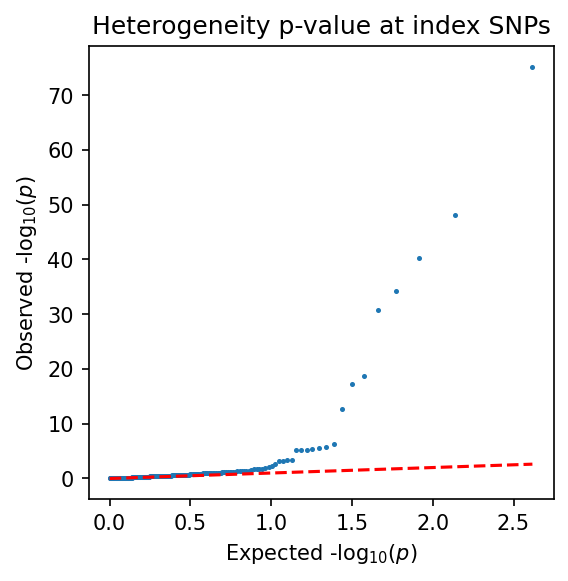

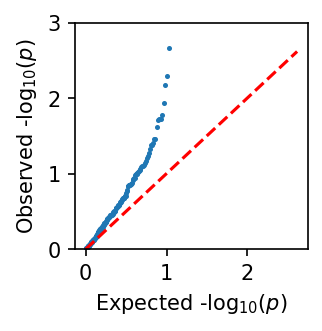

In [27]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
qqplot(df_assoc.HET_pval, ax=ax)
ax.set_title("Heterogeneity p-value at index SNPs")
plt.show()

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)
qqplot(df_assoc.HET_pval, ax=ax)
ax.set_ylim(0, 3)

plt.show()

In [28]:
df_assoc

,trait,id,rsId,chromosome,position,nearestCodingGene,nearestCodingGeneDistance,GWAS_catalog_pval,ldSetSize,EUR_af,AFR_af,EUR_beta,EUR_beta_stderr,AFR_beta,AFR_beta_stderr,HET_pval,assoc_pval
0,crp,1_65624099_C_T,rs6700896,1,65624099,PDE4B,168415,2.000000e-25,129,0.408433,0.465942,-0.078825,0.026669,-0.058604,0.016611,0.475105,3.624774e-05
1,crp,1_154454494_A_C,rs2228145,1,154454494,TDRD10,47725,9.000000e-34,21,0.412968,0.076964,-0.156980,0.026353,-0.016431,0.032193,0.000445,1.553822e-06
2,crp,1_159685728_G_A,rs726640,1,159685728,CRP,28861,6.000000e-117,47,0.001030,0.208739,0.232544,0.483246,0.365418,0.020218,0.783419,1.096978e-71
3,crp,1_247438293_T_C,rs12239046,1,247438293,OR2B11,19812,1.000000e-09,3,0.638524,0.451357,0.035252,0.022846,0.035906,0.016719,0.978590,1.791943e-02
4,crp,2_27508073_T_C,rs1260326,2,27508073,GCKR,11234,3.000000e-27,5,0.604076,0.918421,-0.094591,0.027497,-0.065589,0.021587,0.212499,5.435033e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,bmi,13_53528071_G_A,rs12429545,13,53528071,OLFM4,499258,2.000000e-08,6,0.155075,0.018685,-0.014697,0.029416,0.076984,0.043621,0.079769,5.743546e-01
207,bmi,16_3963466_C_T,rs2531995,16,3963466,CREBBP,82740,5.000000e-09,8,0.579632,0.094109,0.001340,0.016689,0.041867,0.020054,0.102777,1.909695e-01
208,bmi,16_53769662_T_A,rs1558902,16,53769662,RPGRIP1L,65724,4.000000e-29,29,0.381213,0.038373,0.063977,0.019643,0.055455,0.030748,0.810922,2.757239e-04
209,bmi,18_60161902_T_C,rs6567160,18,60161902,MC4R,210873,2.000000e-11,17,0.208939,0.182251,0.086659,0.025641,0.050865,0.015117,0.212765,9.926148e-06


In [102]:
# color points by trait after Bonferroni correction

In [103]:
df_plot = df_assoc[["trait", "id", "HET_pval", "assoc_pval"]].copy()
df_plot.loc[:, "expected_HET_pval"] = stats.norm.sf(
    quantile_normalize(-df_plot.HET_pval)
)
df_plot.loc[:, "bonferroni_significant"] = df_plot["HET_pval"] < 0.05 / len(df_plot)

df_plot["hue"] = ""
df_plot.loc[df_plot.bonferroni_significant, "hue"] = df_plot.loc[
    df_plot.bonferroni_significant, "trait"
]
df_plot.loc[~df_plot.bonferroni_significant, "hue"] = "non-sig"

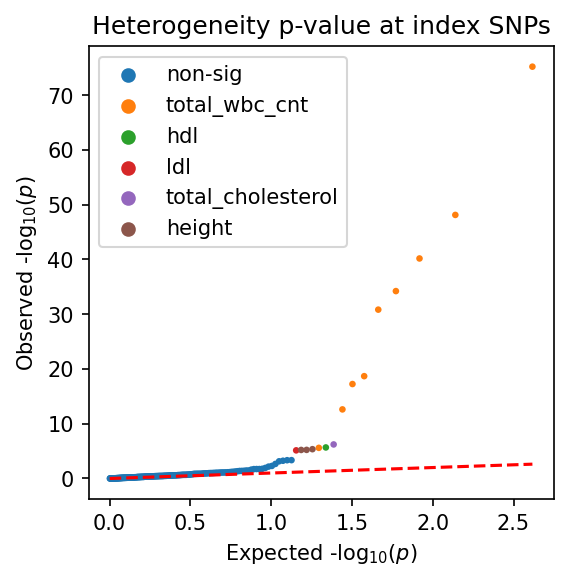

In [112]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sns.scatterplot(
    x=-np.log10(df_plot.expected_HET_pval),
    y=-np.log10(df_plot.HET_pval),
    hue=df_plot.hue,
    s=10,
    linewidth=0,
    palette="tab10",
    ax=ax,
)
lim = max(-np.log10(df_plot.expected_HET_pval))
ax.plot([0, lim], [0, lim], "r--")
ax.set_xlabel("Expected -$\log_{10}(p)$")
ax.set_ylabel("Observed -$\log_{10}(p)$")
handles, labels = ax.get_legend_handles_labels()
ax.set_title("Heterogeneity p-value at index SNPs")

ax.legend(handles=handles, labels=labels, loc="best")